In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
data = pd.read_csv('drug200.csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [39]:
def changeParameterValues(data_frame):
    data_with_codes = data_frame.copy()
    data_with_codes['Sex'] = data_with_codes['Sex'].astype('category').cat.codes
    data_with_codes['BP'] = data_with_codes['BP'].astype('category').cat.codes
    data_with_codes['Cholesterol'] = data_with_codes['Cholesterol'].astype('category').cat.codes
    # data_with_codes['Drug'] = data_with_codes['Drug'].astype('category').cat.codes
    return data_with_codes

In [40]:
new_data = changeParameterValues(data)
Y = new_data['Drug']
X = new_data.drop(['Drug'], axis=1)

In [45]:
training_samples = data.values[:160]
test_samples = data.values[160:200]

max_depth = 2

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
tree_clf = DecisionTreeClassifier(max_depth=max_depth, random_state = 42).fit(X_train, y_train)
train_predict = tree_clf.predict(X_train)
test_predict = tree_clf.predict(X_test)

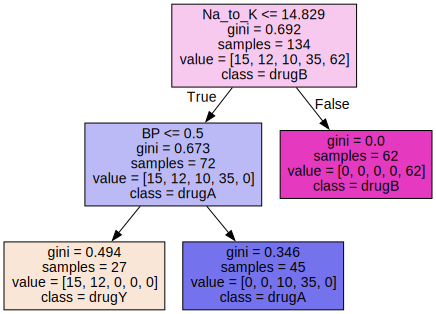

In [47]:
labels = X.columns
graph = Source(tree.export_graphviz(tree_clf ,feature_names = labels, class_names = Y.unique(), max_depth = max_depth, filled = True))
display(SVG(graph.pipe(format='svg')))

In [48]:
print('confusion_matrix\n', confusion_matrix(y_test, test_predict))
print(classification_report(y_test, test_predict))

confusion_matrix
 [[ 8  0  0  0  0]
 [ 4  0  0  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0 19  0]
 [ 0  0  0  0 29]]
              precision    recall  f1-score   support

       drugA       0.67      1.00      0.80         8
       drugB       0.00      0.00      0.00         4
       drugC       0.00      0.00      0.00         6
       drugX       0.76      1.00      0.86        19
       drugY       1.00      1.00      1.00        29

    accuracy                           0.85        66
   macro avg       0.49      0.60      0.53        66
weighted avg       0.74      0.85      0.78        66



C:\Users\Виталий\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Виталий\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Виталий\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera